In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv ("01-sample-data-hirt-windows-dense.tsv", sep = '\t')

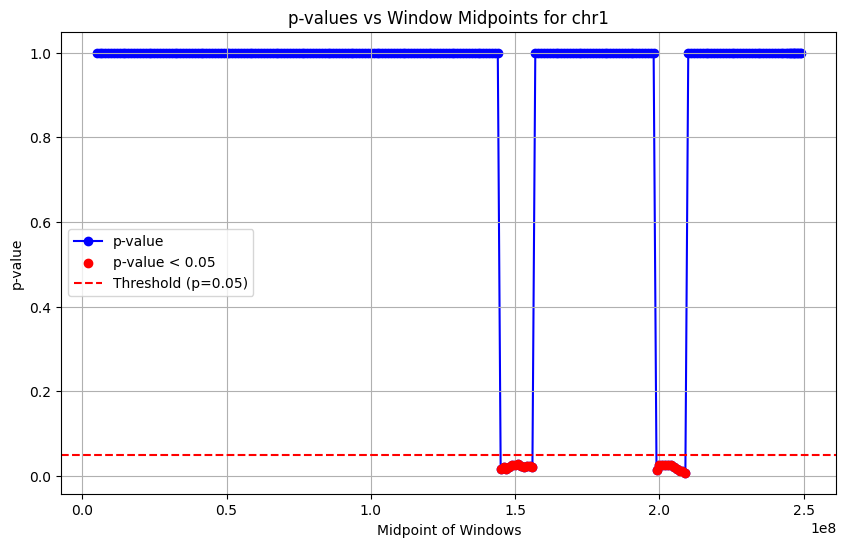

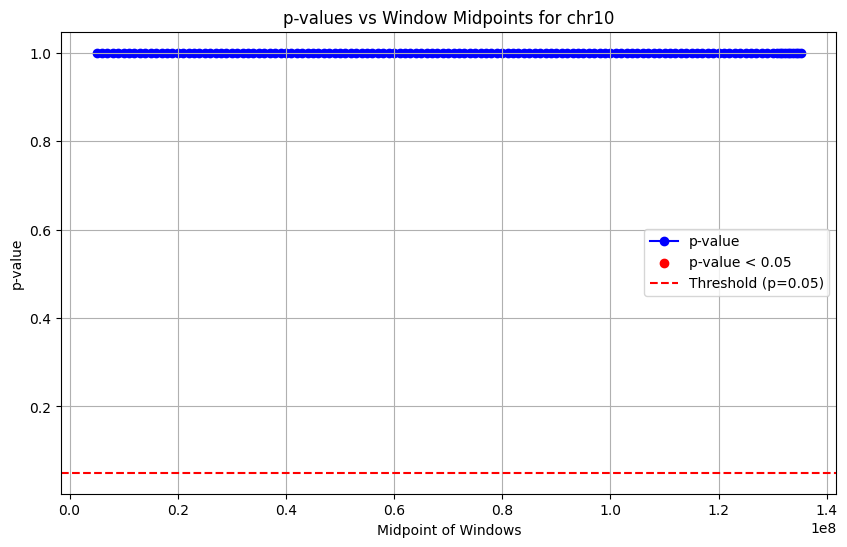

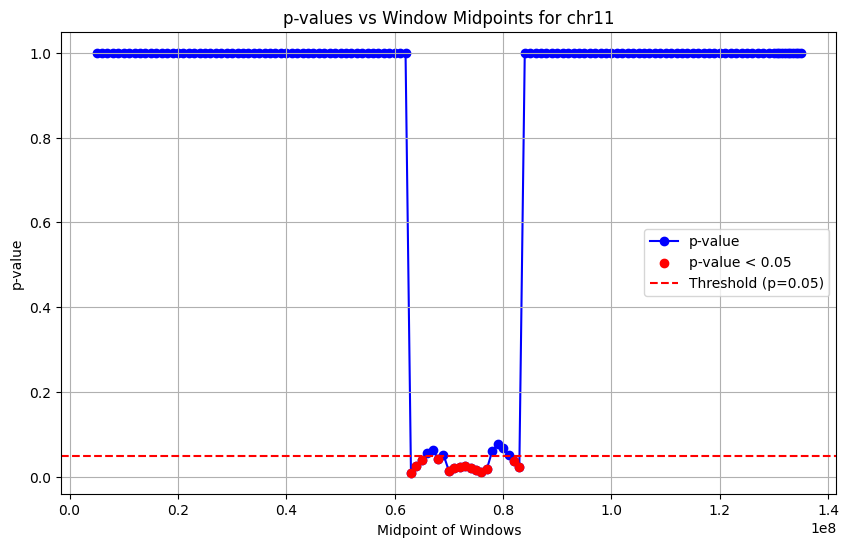

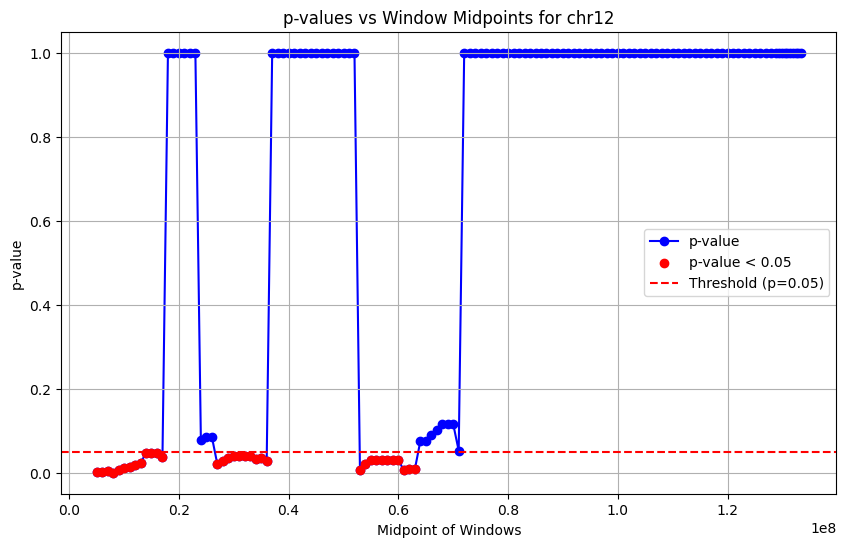

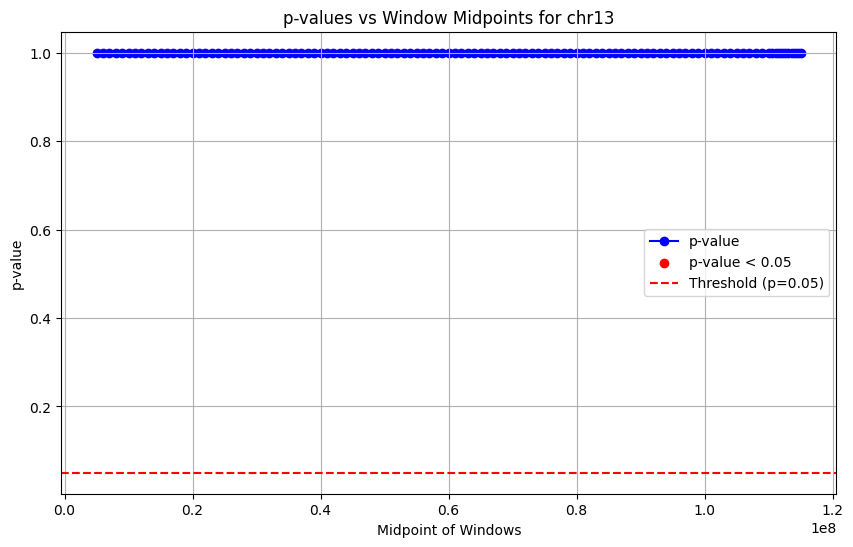

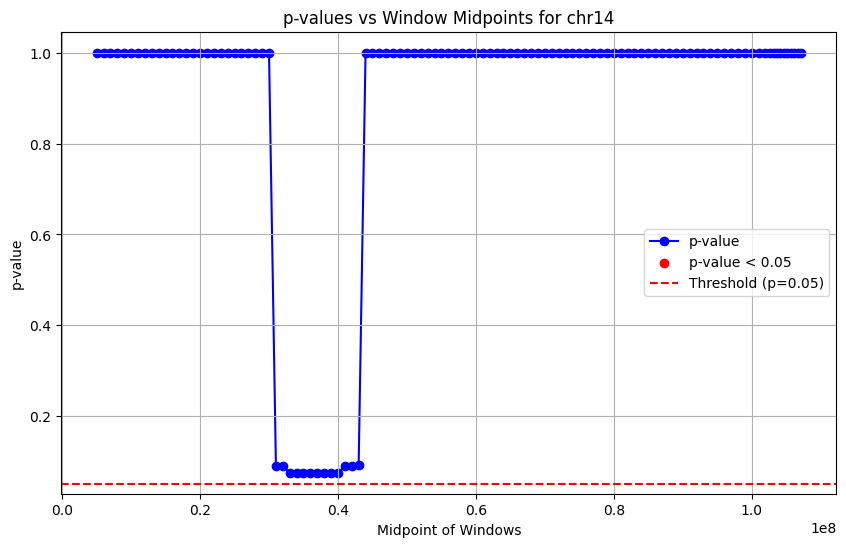

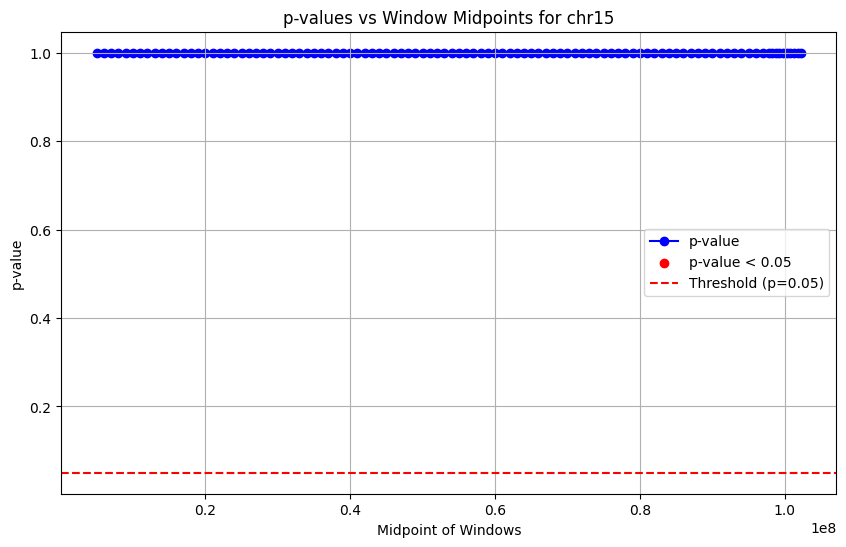

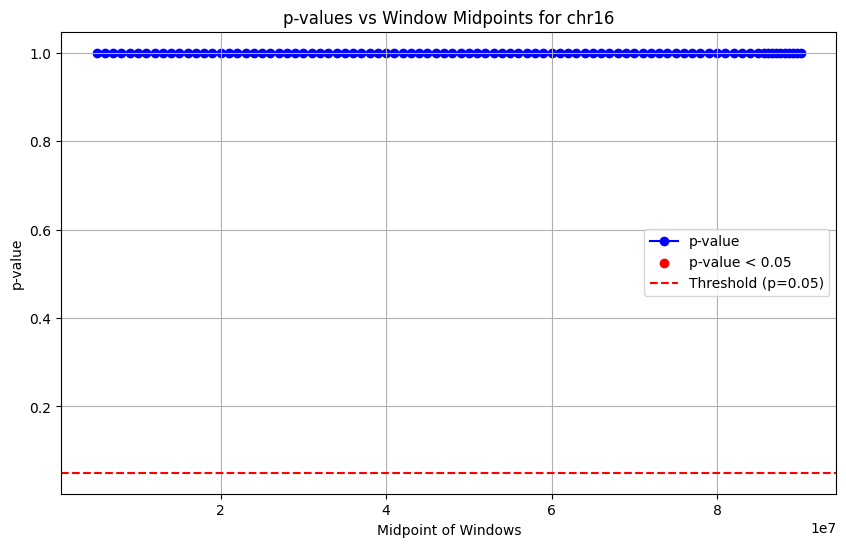

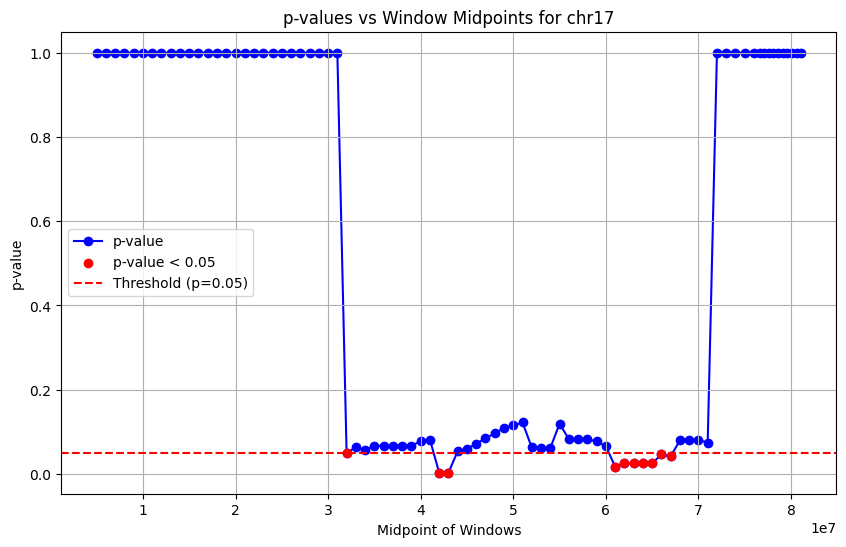

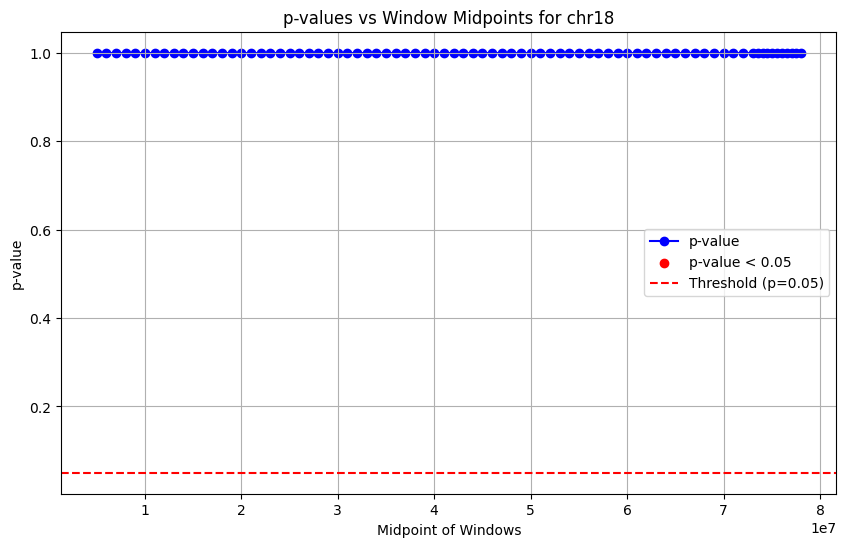

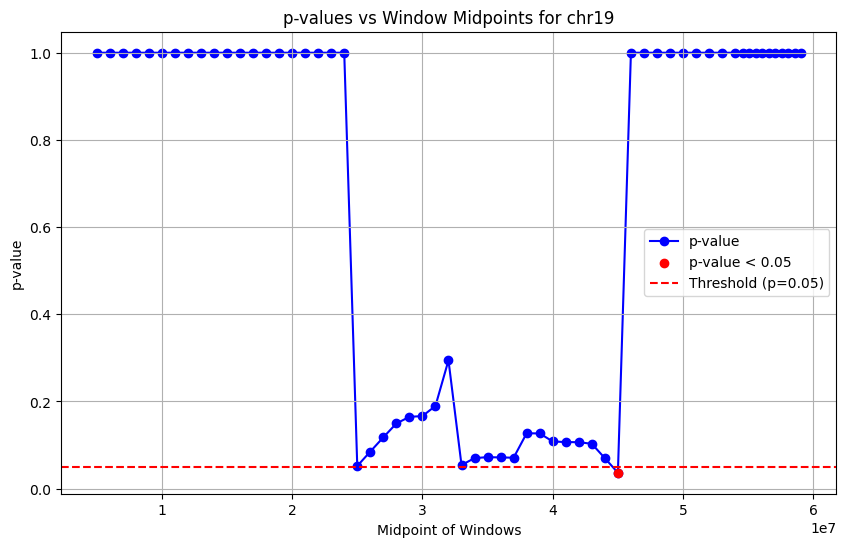

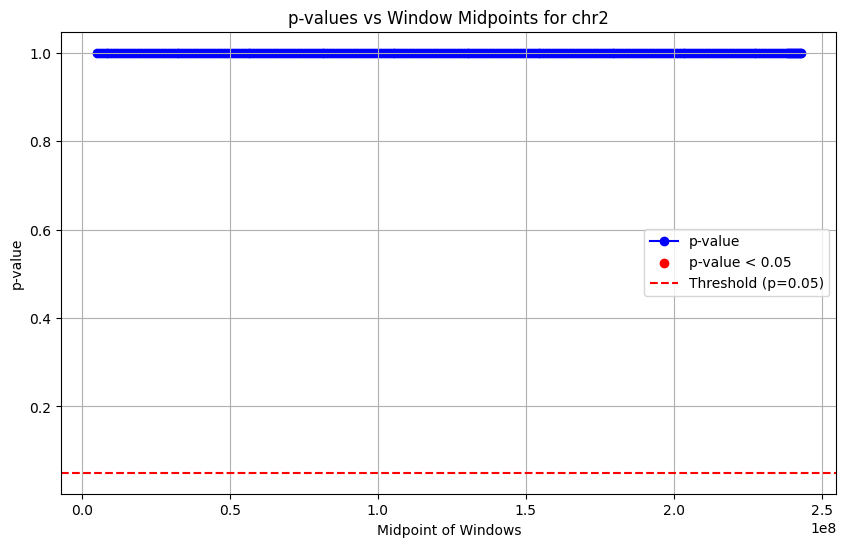

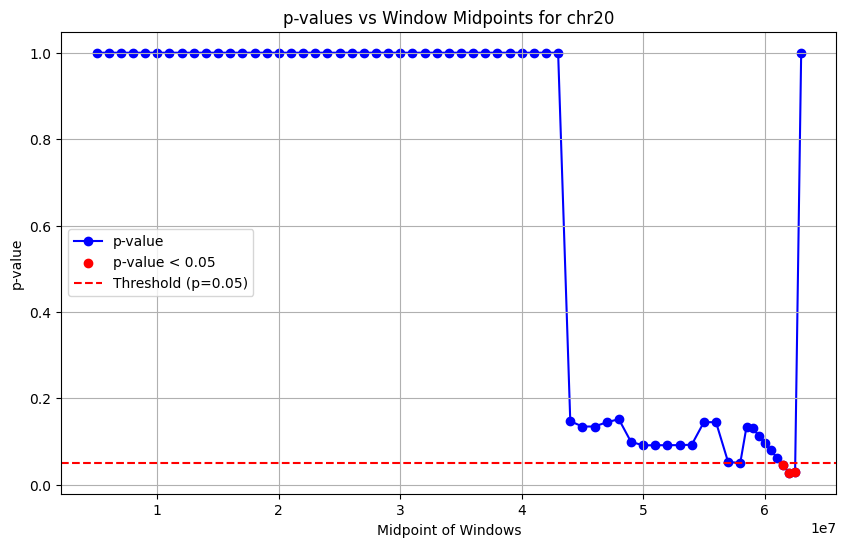

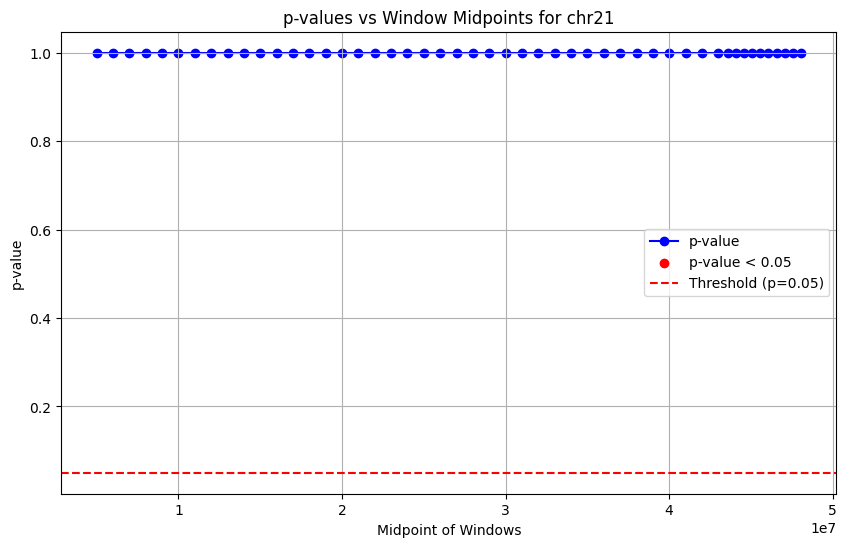

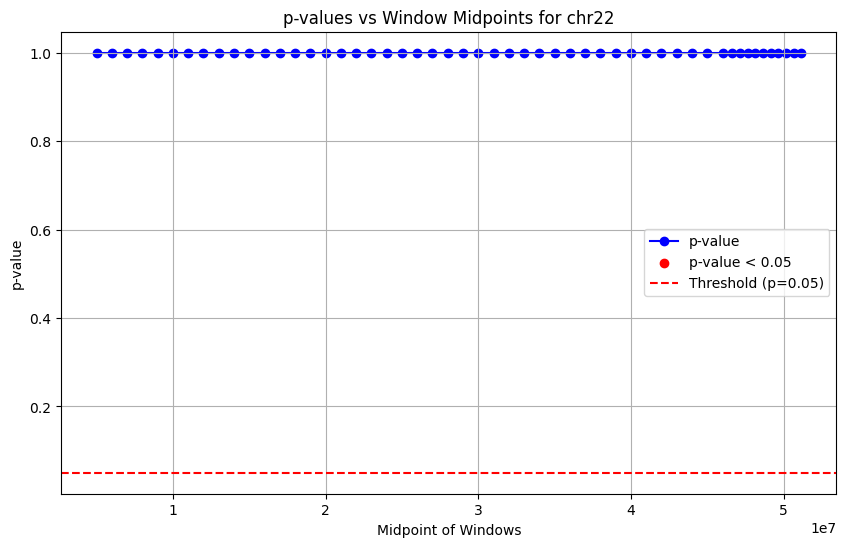

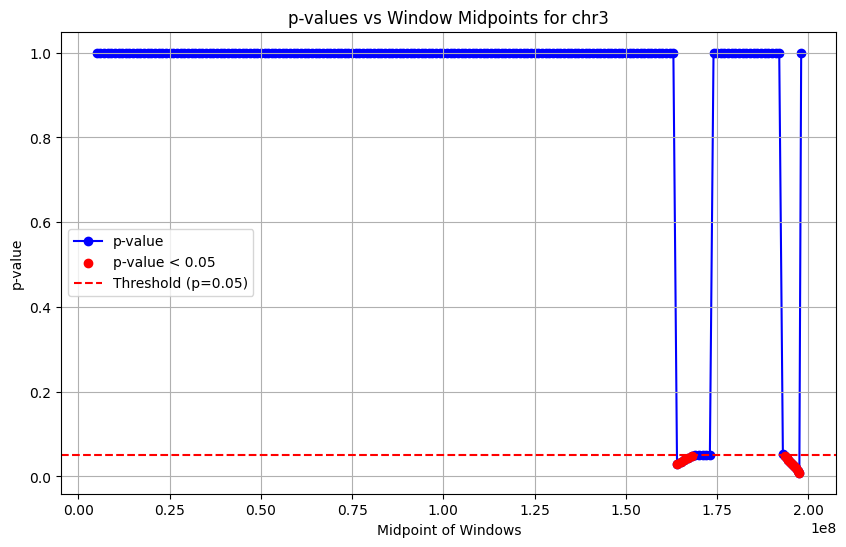

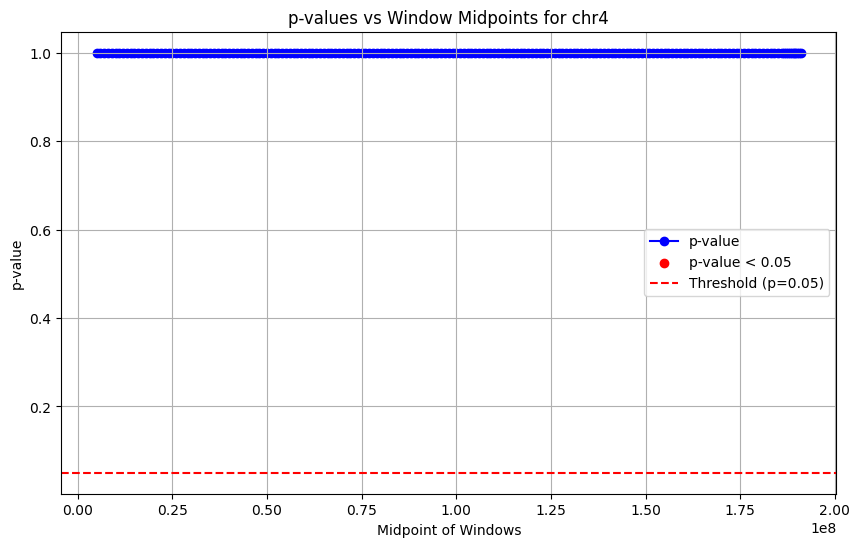

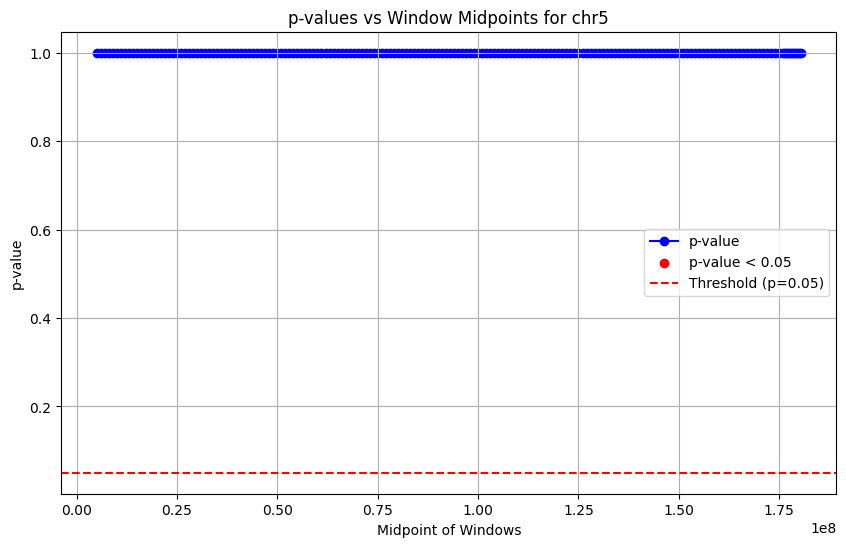

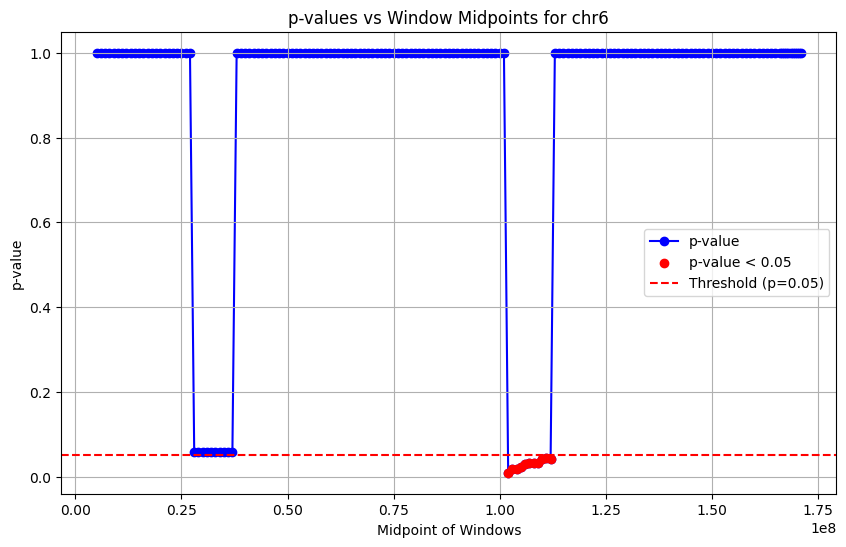

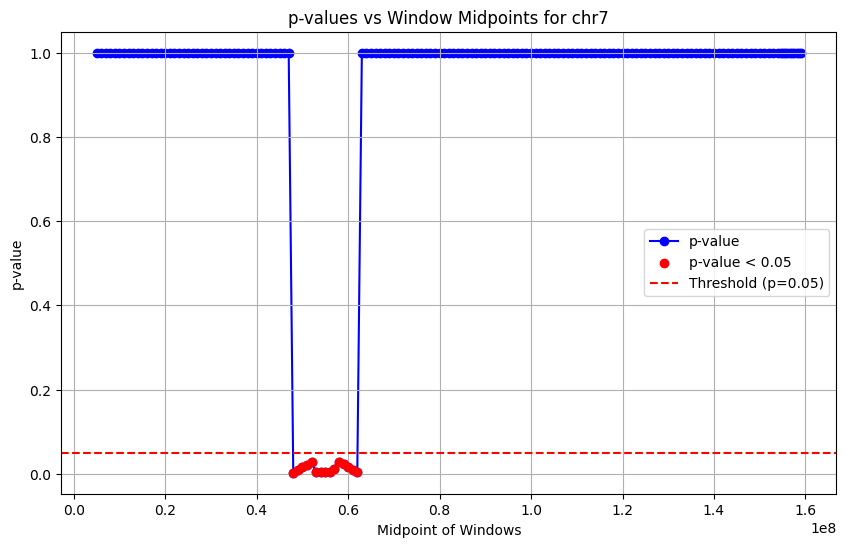

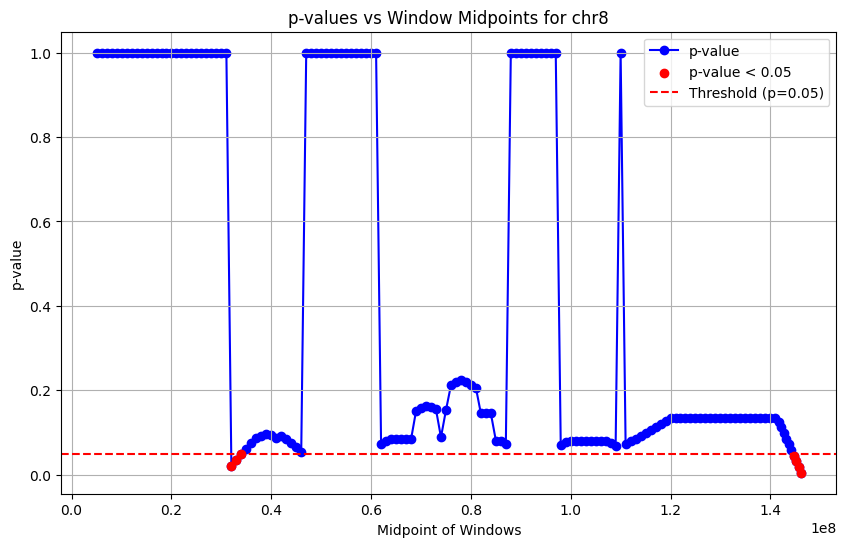

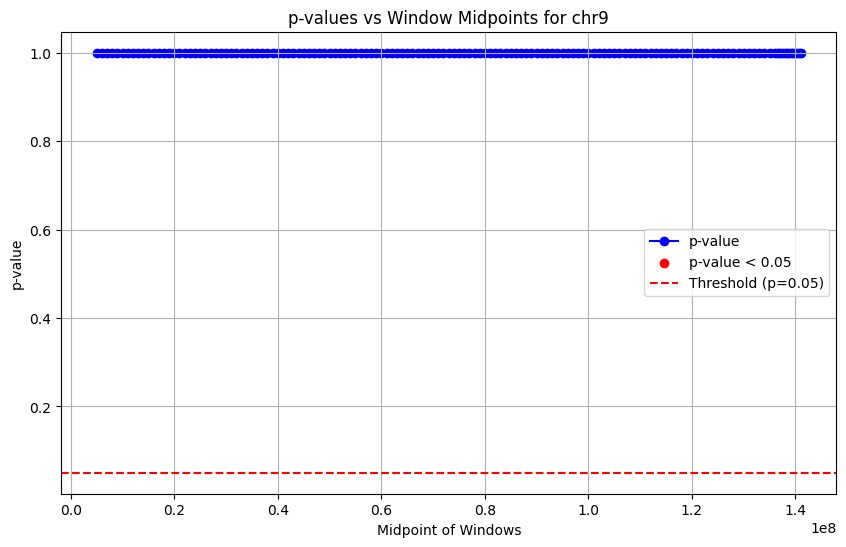

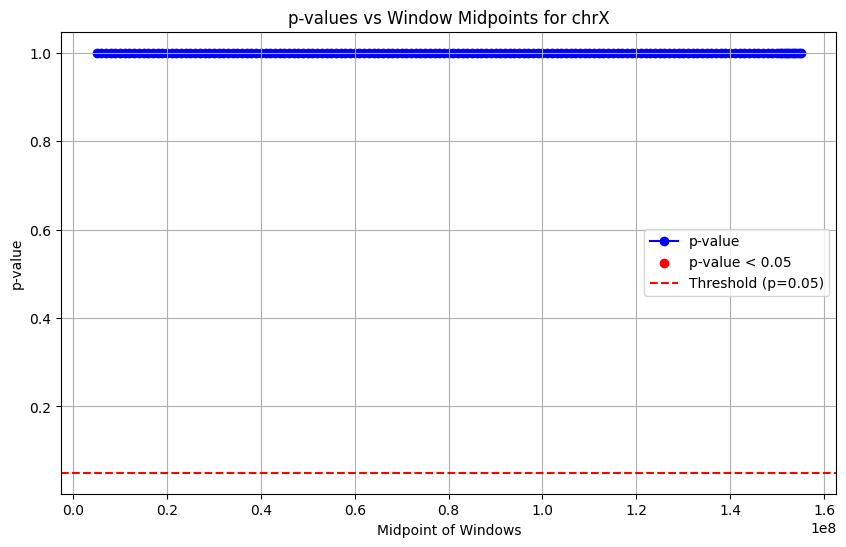

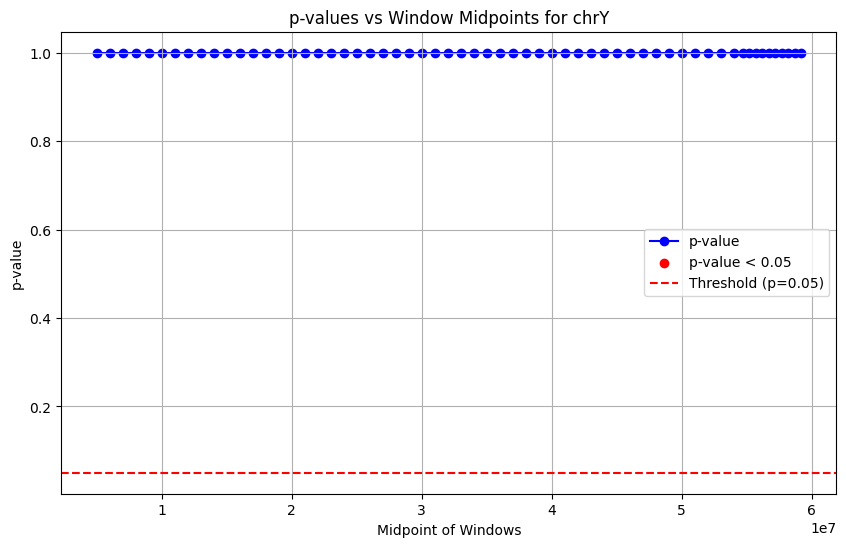

In [22]:
data['midpoint'] = (data['begin'] + data['end']) / 2
grouped = data.groupby('chr_name')
p_value_threshold = 0.05
for chr_name, group in grouped:
    plt.figure(figsize=(10, 6))

    plt.plot(group['midpoint'], group['p-value'], marker='o', linestyle='-', color='blue', label='p-value', zorder=1)
    
    below_threshold = group[group['p-value'] < p_value_threshold]
    plt.scatter(below_threshold['midpoint'], below_threshold['p-value'], color='red', label='p-value < 0.05', zorder=2)
    
    plt.axhline(y=p_value_threshold, color='red', linestyle='--', label='Threshold (p=0.05)')

    plt.xlabel('Midpoint of Windows')
    plt.ylabel('p-value')
    plt.title(f'p-values vs Window Midpoints for {chr_name}')
    plt.legend()
    plt.grid(True)

    plt.show()